# Convert MT time-series to netCDF


### In this notebook, we will create netCDF files from our MT time-series data. 

### Clear notebook memory

In [131]:
%reset -f

#%whos

### Import python modules

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from datetime import datetime, timedelta
#from multiprocessing import Process, Queue
#from multiprocessing import Pool
#import multiprocessing
#import pandas as pd
#from multiprocessing import Pool, cpu_count
%matplotlib inline

In [2]:
working_dir = '/g/data/my80/States_and_Territories/test/TS/example_TS_ascii_to_netcdf'
os.chdir(working_dir)

### Open TS ascii files and create variables to input into netCDF file

In [3]:
LEX = sorted([f for f in os.listdir(working_dir) if f.startswith('cp1') and f.endswith('.ex')])
LEY = sorted([f for f in os.listdir(working_dir) if f.startswith('cp1') and f.endswith('.ey')])
LBX = sorted([f for f in os.listdir(working_dir) if f.startswith('cp1') and f.endswith('.bx')])
LBY = sorted([f for f in os.listdir(working_dir) if f.startswith('cp1') and f.endswith('.by')])
EX1 = []
EY1 = []
BX1 = []
BY1 = []

types = [LEX]

In [4]:
def array_for_netcdf(ty):
    for i in ty:
        for a in i:
            if a.endswith('ex'):
                print a
                df = open(a)
                for line in df:
                    EX1.append(line)
            elif a.endswith('ey'):
                print a
                df = open(a)
                for line in df:
                    EY1.append(line)
            elif a.endswith('bx'):
                print a
                df = open(a)
                for line in df:
                    BX1.append(line)
            elif a.endswith('by'):
                print a
                df = open(a)
                for line in df:
                    BY1.append(line)
            else:
                print 'something went horribly wrong'
    
if __name__ == '__main__':
    ty = [LEX, LEY, LBX, LBY]
    array_for_netcdf(ty)

cp1b01_296.ex
cp1b01_296.ey
cp1b01_296.bx
cp1b01_296.by


### Check that variables are the correct length

In [5]:
print len(EX1)
print len(EY1)
print len(BX1)
print len(BY1)

82800000
82800000
82800000
82800000


### Create a time variable

In [7]:
#timea = pd.period_range('2010-10-23 01:00:00', periods=82800000, freq='L' )
#time1 = np.array(timea)

t1 = float(1287756000)
t2 = float(1287838799)

time1 = np.linspace(t1,t2,num = len(EX1))


### Check start-time and end-time are correct

In [9]:
print datetime.fromtimestamp(t1)
print datetime.fromtimestamp(t2)

2010-10-23 01:00:00
2010-10-23 23:59:59


### Check TS variables look reasonable

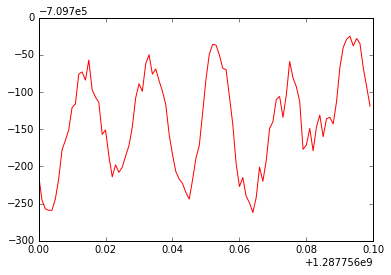

In [140]:
plt.plot(time1[:100],EX1[:100],color='r')

### Create netCDF file and add time-series dimensions and variables (including local attributes)

In [10]:
dataset_P = Dataset('netCDF_test.nc','w',format='NETCDF4')

ex = dataset_P.createDimension('ex', len(EX1))
ey = dataset_P.createDimension('ey', len(EY1))
bx = dataset_P.createDimension('bx', len(BX1))
by = dataset_P.createDimension('by', len(BY1))
time = dataset_P.createDimension('time', len(time1))

lon1 = [134.5]

LON = dataset_P.createDimension('longitude', len(lon1))
lons = dataset_P.createVariable('longitude',np.float32,('longitude',))
lons.units = 'degrees_east'
lons.long_name = 'longitude'
lons.standard_name = 'longitude'
lons[:] = lon1

lat1 = [-27.1]

LAT = dataset_P.createDimension('latitude', len(lat1))
lats = dataset_P.createVariable('latitude',np.float32,('latitude',))
lats.units = 'degrees_north'
lats.long_name = 'latitude'
lats.standard_name = 'latitude'
lats[:] = lat1

ex = dataset_P.createVariable('ex',np.float32,('ex',))
ex.units = 'microV/m'
ex.long_name = 'electric field in x direction'
ex.standard_name = 'electric field'
ex.sampling_rate = '1000 Hz'
ex.dipole_length = '46 m'
ex.logger_gain = '1'
ex.interface_box_gain = '10'
ex.instrument_type = 'Ag-AgCl electrodes'
ex.logger_type = 'zen'
ex.azimuth = '0'
ex[:] = EX1


ey = dataset_P.createVariable('ey',np.float32,('ey',))
ey.units = 'microV/m'
ey.long_name = 'electric field in y direction'
ey.standard_name = 'electric field'
ey.sampling_rate = '1000 Hz'
ey.dipole_length = '49 m'
ey.logger_gain = '1'
ey.interface_box_gain = '10'
ey.instrument_type = 'Ag-AgCl electrodes'
ey.logger_type = 'zen'
ey.azimuth = '90'
ey[:] = EY1

bx = dataset_P.createVariable('bx',np.float32,('bx',))
bx.units = 'microV/nT'
bx.long_name = 'Long period magnetic field in x direction'
bx.standard_name = 'magnetic field'
bx.sampling_rate = '1000 Hz'
bx.magnetic_declination = '0'
bx.azimuth = '0'
bx.logger_gain = '1'
bx.interface_box_gain = '10'
bx[:] = BX1

by = dataset_P.createVariable('by',np.float32,('by',))
by.units = 'microV/nT'
by.long_name = 'Long period magnetic field in y direction'
by.standard_name = 'magnetic field'
by.sampling_rate = '1000 Hz'
by.magnetic_declination = '0'
by.azimuth = '90'
by.logger_gain = '1'
by.interface_box_gain = '10'
by[:] = BY1


time = dataset_P.createVariable('time',np.float64,('time',))
time.units = 'seconds'
time.long_name = 'time'
time.standard_name = 'time'
time.sampling_rate = '1000 Hz'
time[:] = time1


### Add global attributes to netCDF file

In [11]:
# Global Attributes

dataset_P.title = 'Capricorn Orogen magnetotelluric (MT) surveys 2010'
dataset_P.summary = 'This survey was conducted across the southern Pilbara and Gascoyne regions from April to early July 2010. The addition of this survey to the existing set improves the understanding of the crustal structure of Western Australia.This survey was conducted across the southern Pilbara and Gascoyne regions from April to early July 2010. The addition of this survey to the existing set improves the understanding of the crustal structure of Western Australia. The Capricorn Orogen deep seismic reflection and MT surveys were funded through the Exploration Incentive Scheme (EIS) and through the Australia Federal Governments National Earth Science Infrastructure Program (AuScope). Acquisition and interpretation was managed by Geoscience Australia (GA) and the Australian National Seismic Imaging Resource (ANSIR) through the National Geoscience Agreement. The main objectives for the Capricorn survey were to image the: 1) overall structure and dip of the suture between the Yilgarn Craton and Gascoyne Province (Errabiddy Shear Zone), and the suture between the Pilbara Craton and the Gascoyne Province 2) depth and shape of the Minnie Creek batholith and other Proterozoic granite intrusions 3) nature of reactivated Fortescue Group growth faults in the southern Pilbara 4) dip of major faults that mark the boundary between the Pilbara Craton and the Ashburton Basin 5) deep crustal structure of the Ashburton Basin 6) deep crustal structure of the Edmund and Collier Basins and nature of major growth faults, such as the Talga Fault '
dataset_P.source = 'The University of Adelaide'
dataset_P.date_created = '20180501T113000'
dataset_P.Conventions = 'ACDD-1.3'
dataset_P.metadata_link = ' https://geoenetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/fxxxxx'
dataset_P.license = 'Creative Commons Attribution 4.0 International (CC BY 4.0)'
dataset_P.processing_level = 'MT broad band time-series'
dataset_P.institution = 'The University of Adelaide'
dataset_P.project = 'Caprocprn Orogen deep seismic reflection and magnetotelluric surveys 2010'
dataset_P.instrument = 'Auscope long-period MT instruments'
dataset_P.boxnumber = '26'
dataset_P.surveydate = '2010/10/23'
dataset_P.elevation = '2113.2'
dataset_P.hx = '2274'
dataset_P.hy = '2284'
dataset_P.hz = '2254'
dataset_P.location = 'Earth'
dataset_P.station = 'c01'
dataset_P.station_type = 'mt'
dataset_P.sampling_interval = 'all'
dataset_P.time_start = '2010-10-23T01:00:00Z'
dataset_P.time_end = '2010-10-23T23:59:59Z'
#dataset_P.references = 'https://doi.org/10.1071/ASEG2015ab277'
dataset_P.keywords = 'Magnetotellurics, electrical resistivity, Long Period, WA Capricorn, Broad Band'
dataset_P.birrpstring = birrpstring = """0
2
2
2
-10
65536,10
y
0,0.999
0.4
c01
0
1
3
0
0
20000000
0
{0}
0
0
{1}
0
0
{2}
0
0
{3}
0
0
{4}
0
0
{5}
0
0,90,0
0,90,0
0,90,0
""".format('ex','ey','bx','by','bx','by')

dataset_P.birrp_cfg = """[DEFAULT]
ainuin = 0.999
coherence_threshold = 0.4
ilev = 0
imode = 2
jmode = 0
max_window_length = 12936
n_bisections = 10
n_output_channels = 2
n_samples = 20000000
nar = 3
nfil = 0
ninp = 2
nlev = 0
nout = 2
npcs = 1
nskip = 0
phi = 0
rr_station = c01
sampling_rate = 10.0
station = c01
tbw = 2
theta1 = 0
theta2 = 90
uin = 0
"""
dataset_P.survey_cfg = """[c01]
b_instrument_amplification = 10
b_instrument_type = coil
b_logger_gain = 1
b_logger_type = zen
b_xaxis_azimuth = 0
b_yaxis_azimuth = 90
box = 26
date = 2010/10/23
e_instrument_amplification = 10
e_instrument_type = Ag-AgCl electrodes
e_logger_gain = 1
e_logger_type = Ag-AgCl electrodes
e_xaxis_azimuth = 0
e_xaxis_length = 46 m
e_yaxis_azimuth = 90
e_yaxis_length = 49 m
elevation = 2113.2
hx = 2274
hy = 2284
hz = 2254
lat = -27.1000003815
location = Earth
lon = 134.5
station = c01
station_type = mt
sampling_interval = all
"""

dataset_P.EDI = """ >HEAD

   DATAID="CP1B01"               
   ACQBY="Adelaide University"   
   ACQDATE=23/10/2010 01:00      
   FILEDATE=17/02/11             
   PROSPECT="Capricorn"          
   LOC="CP1B01"                  
   LAT=-22.48308                 
   LONG=117.74262                
   ELEV=639                      

 >INFO   MAXLINES=1000

 >=DEFINEMEAS

   MAXCHAN=6
   MAXRUN=999
   MAXMEAS=99999
   UNITS=M
   REFTYPE=CART
   REFLAT=-22.48308              
   REFLONG=117.74262             
   REFELEV=639                   

 >HMEAS ID= 1001.001 CHTYPE=HX X = 0.  Y = 0.  AZM = 0.
 >HMEAS ID= 1002.001 CHTYPE=HY X = 0.  Y = 0.  AZM= 90.
 >EMEAS ID= 1003.001 CHTYPE=EX X = 0.  Y = 0. X2 = 46.  Y2 = 0.
 >EMEAS ID= 1004.001 CHTYPE=EY X = 0.  Y = 0. X2 = 0.  Y2 = 49.
 >HMEAS ID= 1005.001 CHTYPE=HX X = 0.  Y = 0.  AZM= 0.
 >HMEAS ID= 1006.001 CHTYPE=HY X = 0.  Y = 0.  AZM= 90.

 >=MTSECT
   SECTID=c01
   NFREQ=   26
   HX = 1001.001
   HY = 1002.001
   EX = 1003.001
   EY = 1004.001
   RX = 1005.001
   RY = 1006.001

 >!****FREQUENCIES****!
 >FREQ NFREQ= 26  ORDER=INC // 26
    0.38147E-01    0.61035E-01    0.76294E-01    0.12207E+00    0.15259E+00
    0.24414E+00    0.30518E+00    0.48828E+00    0.61035E+00    0.97656E+00
    0.12207E+01    0.19531E+01    0.24414E+01    0.39062E+01    0.48828E+01
    0.78125E+01    0.97656E+01    0.15625E+02    0.19531E+02    0.31250E+02
    0.39062E+02    0.62500E+02    0.78125E+02    0.12500E+03    0.15625E+03
    0.25000E+03
 >!****IMPEDANCES****!
 >ZXXR // 26
   -0.44327E+00   -0.26625E+01    0.46049E+00    0.56364E+00    0.57152E+00
    0.59396E+00    0.59081E+00    0.67098E+00    0.62623E+00    0.59566E+00
    0.62351E+00    0.79927E+00    0.95460E+00    0.16753E+01    0.23511E+01
    0.40092E+01    0.42265E+01    0.59329E+01    0.67558E+01    0.64058E+01
    0.11664E+02    0.86670E+01    0.44399E+01   -0.21714E+00   -0.29885E+01
   -0.48281E+01
 >ZXXI // 26
    0.46960E+00    0.39444E+00    0.37653E+00    0.35081E+00    0.37132E+00
    0.42697E+00    0.34787E+00    0.27211E+00    0.42564E+00    0.77741E+00
    0.10079E+01    0.15128E+01    0.17848E+01    0.26411E+01    0.29097E+01
    0.32121E+01    0.32062E+01    0.19400E+01    0.22719E+00   -0.20125E+01
    0.13069E+02    0.29387E+01   -0.19915E+01   -0.46283E+01   -0.42915E+01
   -0.32431E+01
 >ZXX.VAR // 26
    0.58392E+00    0.26810E+00    0.19542E-02    0.13228E-01    0.12507E-01
    0.89072E-02    0.14495E-02    0.68923E-03    0.61660E-03    0.19105E-02
    0.15167E-02    0.25468E-02    0.25983E-02    0.34299E-02    0.33525E-02
    0.70537E-03    0.18979E-02    0.12378E-02    0.11475E-02    0.63023E-03
    0.65161E-02    0.44747E-02    0.14962E-02    0.16737E-02    0.14638E-02
    0.29286E-02
 >ZXYR // 26
   -0.26648E-01    0.82435E+00    0.26319E+00    0.30035E+00    0.21084E+00
    0.34265E-01   -0.10687E+00   -0.22633E+00   -0.35426E+00   -0.61359E+00
   -0.70068E+00   -0.55762E+00   -0.22691E+00    0.20408E+01    0.51009E+01
    0.15103E+02    0.23824E+02    0.43505E+02    0.56366E+02    0.73560E+02
    0.69859E+02    0.78639E+02    0.82982E+02    0.87041E+02    0.82349E+02
    0.82687E+02
 >ZXYI // 26
   -0.95257E-01    0.56529E+00    0.16447E+00    0.12847E+00    0.22258E+00
    0.73989E+00    0.98822E+00    0.16986E+01    0.23092E+01    0.39944E+01
    0.53358E+01    0.91095E+01    0.11825E+02    0.20797E+02    0.26152E+02
    0.38278E+02    0.42795E+02    0.49434E+02    0.48433E+02    0.41547E+02
    0.22777E+02    0.19273E+02    0.22562E+02    0.23133E+02    0.24032E+02
    0.25246E+02
 >ZXY.VAR // 26
    0.42988E+00    0.43859E+00    0.20175E-02    0.13173E-01    0.13421E-01
    0.75201E-02    0.14977E-02    0.13319E-02    0.96171E-03    0.25464E-02
    0.15511E-02    0.38635E-02    0.38170E-02    0.46158E-02    0.60336E-02
    0.27778E-02    0.46100E-02    0.16453E-02    0.13369E-02    0.58955E-03
    0.53401E-02    0.48939E-02    0.19358E-02    0.23141E-02    0.24598E-02
    0.44945E-02
 >ZYXR // 26
   -0.22142E+01   -0.38310E+01   -0.40580E+01   -0.43981E+01   -0.46885E+01
   -0.57701E+01   -0.61378E+01   -0.72024E+01   -0.78769E+01   -0.99293E+01
   -0.11117E+02   -0.14394E+02   -0.16577E+02   -0.22670E+02   -0.27186E+02
   -0.36239E+02   -0.40302E+02   -0.53441E+02   -0.59981E+02   -0.68305E+02
   -0.79638E+02   -0.80522E+02   -0.78122E+02   -0.78447E+02   -0.73020E+02
   -0.73578E+02
 >ZYXI // 26
   -0.19394E+01    0.10589E-01   -0.24206E+01   -0.33747E+01   -0.37145E+01
   -0.41992E+01   -0.51341E+01   -0.69401E+01   -0.76256E+01   -0.10168E+02
   -0.11777E+02   -0.15617E+02   -0.17774E+02   -0.22825E+02   -0.25494E+02
   -0.30058E+02   -0.30961E+02   -0.31538E+02   -0.30021E+02   -0.26204E+02
   -0.21322E+02   -0.20073E+02   -0.22038E+02   -0.24485E+02   -0.25369E+02
   -0.28741E+02
 >ZYX.VAR // 26
    0.72531E+00    0.34810E+00    0.10581E-01    0.48191E-01    0.43113E-01
    0.23871E-01    0.43235E-02    0.18267E-02    0.17336E-02    0.36324E-02
    0.28214E-02    0.33997E-02    0.31387E-02    0.29680E-02    0.22117E-02
    0.52945E-03    0.10360E-02    0.53337E-03    0.37994E-03    0.33570E-03
    0.24485E-02    0.20074E-02    0.10057E-02    0.17054E-02    0.21290E-02
    0.39388E-02
 >ZYYR // 26
   -0.16580E+01    0.55103E-01   -0.29996E+01   -0.23860E+01   -0.21560E+01
   -0.27695E+01   -0.28269E+01   -0.24845E+01   -0.21830E+01   -0.14827E+01
   -0.11111E+01    0.35025E+00    0.11699E+01    0.40835E+01    0.60067E+01
    0.89569E+01    0.89933E+01    0.79566E+01    0.54601E+01    0.12250E+01
    0.74394E+01    0.16723E+01   -0.22411E+01   -0.41903E+01   -0.16425E+01
   -0.69623E+00
 >ZYYI // 26
   -0.90523E+00    0.25965E+00    0.11017E+00    0.41802E+00    0.62882E+00
    0.10750E+01    0.12414E+01    0.20023E+01    0.20172E+01    0.27763E+01
    0.32608E+01    0.41912E+01    0.47628E+01    0.54067E+01    0.46174E+01
    0.21269E+01    0.24797E+00   -0.49399E+01   -0.68641E+01   -0.74936E+01
   -0.12499E+02   -0.98253E+01   -0.57024E+01   -0.17552E+00    0.20136E+01
    0.34510E+01
 >ZYY.VAR // 26
    0.71284E+00    0.62434E+00    0.11302E-01    0.40725E-01    0.59773E-01
    0.19966E-01    0.47040E-02    0.34225E-02    0.24680E-02    0.44178E-02
    0.23959E-02    0.42534E-02    0.35118E-02    0.33370E-02    0.28465E-02
    0.16291E-02    0.18247E-02    0.57730E-03    0.32430E-03    0.25724E-03
    0.19862E-02    0.21254E-02    0.11422E-02    0.18330E-02    0.25298E-02
    0.39368E-02

 >END
"""



### Close and save netCDF file

In [12]:
dataset_P.close()

In [ ]:
#%reset -f

#%whos

In [136]:
# if __name__ == '__main__':
#     procs = []
    
#     for ty in types:
#         proc = Process(target=array_for_netcdf, args=(ty,))
#         procs.append(proc)
#         proc.start()

#     for proc in procs:
#         proc.join()


In [ ]:
#time = dataset_P.createDimension('time', None)

#time = dataset_P.createDimension('time', len(TIME1))
#time = dataset_P.createVariable('time',np.float64,('time',))
#time.long_name = 'time of measurement'
#time.units = 'seconds since 2013-12-03 00:00:00.0'
#time.calendar = 'gregorian'
#time[:] = TIME1

#EX = dataset_P.createDimension('EX', len(EX1))
#ex = dataset_P.createVariable('EX',np.float32,('EX',))
#ex.units = 'counts'
#ex[:] = EX1



In [ ]:
# dataset_P = Dataset('netCDF_test.nc','a')

# lon1 = [134.5]

# LON = dataset_P.createDimension('lon', len(lon1))
# lons = dataset_P.createVariable('lon',np.float32,('lon',))
# lons.units = 'degrees_east'
# lons.long_name = 'longitude'
# lons.standard_name = 'longitude'
# lons[:] = lon1

# lat1 = [-27.1]

# LAT = dataset_P.createDimension('lat', len(lat1))
# lats = dataset_P.createVariable('lat',np.float32,('lat',))
# lats.units = 'degrees_north'
# lats.long_name = 'latitude'
# lats.standard_name = 'latitude'
# lats[:] = lat1

In [25]:
# LEX = sorted([f for f in os.listdir(working_dir) if f.startswith('cp1') and f.endswith('.ex')])
# EX1 = []

# for file_ in LEX:
#     df = open(file_)
#     for line in df:
#         EX1.append(line)
        
# LEY = sorted([f for f in os.listdir(working_dir) if f.startswith('cp1') and f.endswith('.ey')])
# EY1 = []

# for file_ in LEY:
#     df = open(file_)
#     for line in df:
#         EY1.append(line)
        

# LBX = sorted([f for f in os.listdir(working_dir) if f.startswith('cp1') and f.endswith('.bx')])
# BX1 = []

# for file_ in LBX:
#     df = open(file_)
#     for line in df:
#         BX1.append(line)      
        
# LBY = sorted([f for f in os.listdir(working_dir) if f.startswith('cp1') and f.endswith('.by')])
# BY1 = []

# for file_ in LBY:
#     df = open(file_)
#     for line in df:
#         BY1.append(line)        
        



#lon1 = [134.5]*len(EX1)
#lat1 = [-27.1]*len(EX1)
#LTIME = sorted([f for f in os.listdir(working_dir) if f.endswith('.time')])
#TIME1 = []

#for file_ in LTIME:
    #df = open(file_)
    #for line in df:
        #TIME1.append(line)
       